In [1]:
print('KNN')

KNN


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

#Import datasets

In [4]:
df = pd.read_csv('sample.csv')

# Exploratory data analysis

In [5]:
df.shape

(699, 12)

In the dataset description, it is given that there are 10 attributes and 1 Class which is the target variable. So, we have 10 attributes and 1 target variable.



In [6]:
df = df.drop(['Unnamed: 0'], axis=1,)

In [7]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**Rename column names**

In [8]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [9]:
# let's agian preview the dataset

df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Drop redundant columns

**We should drop any redundant columns from the dataset which does not have any predictive power. Here, Id is the redundant column. So, I will drop it first.**

In [9]:
# drop Id column from dataset

df.drop('Id', axis=1, inplace=True)

In [10]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Frequency distribution of values in variables

In [12]:
for col in df.columns:
    
    print(df[col].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

* The distribution of values shows that data type of Bare_Nuclei is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to intege *

***Convert data type of Bare_Nuclei to integer***

In [13]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# pandas aslo used for convert into numeric data type

In [14]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

** Now, we can see that all the columns of the dataframe are of type numeric.**

# Summary of variables

There are 10 numerical variables in the dataset.

Out of all the 10 variables, the first 9 variables are feature variables and last variable Class is the target variable.

# Missing values in variables

In [15]:
# check missing values in variables

df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

** We can see that the Bare_Nuclei column contains 16 nan values **

***We can see that there are 16 nan values in the dataset. I will impute missing values after dividing the dataset into training and test set.***

In [16]:
# check frequency distribution of `Bare_Nuclei` column

df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [17]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [18]:
# view percentage of frequency distribution of values in `Class` variable

df['Class'].value_counts()/np.float(len(df))

2    0.655222
4    0.344778
Name: Class, dtype: float64

We can see that the Class variable contains 2 class labels - 2 and 4. 2 stands for benign and 4 stands for malignant cancer.

In [19]:
# # view summary statistics in numerical variables
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Data Visualization

#**Now, we have a basic understanding of our data. I will supplement it with some data visualization to get better understanding of our data.**

#Univariate plots

# Check the distribution of variables

Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed

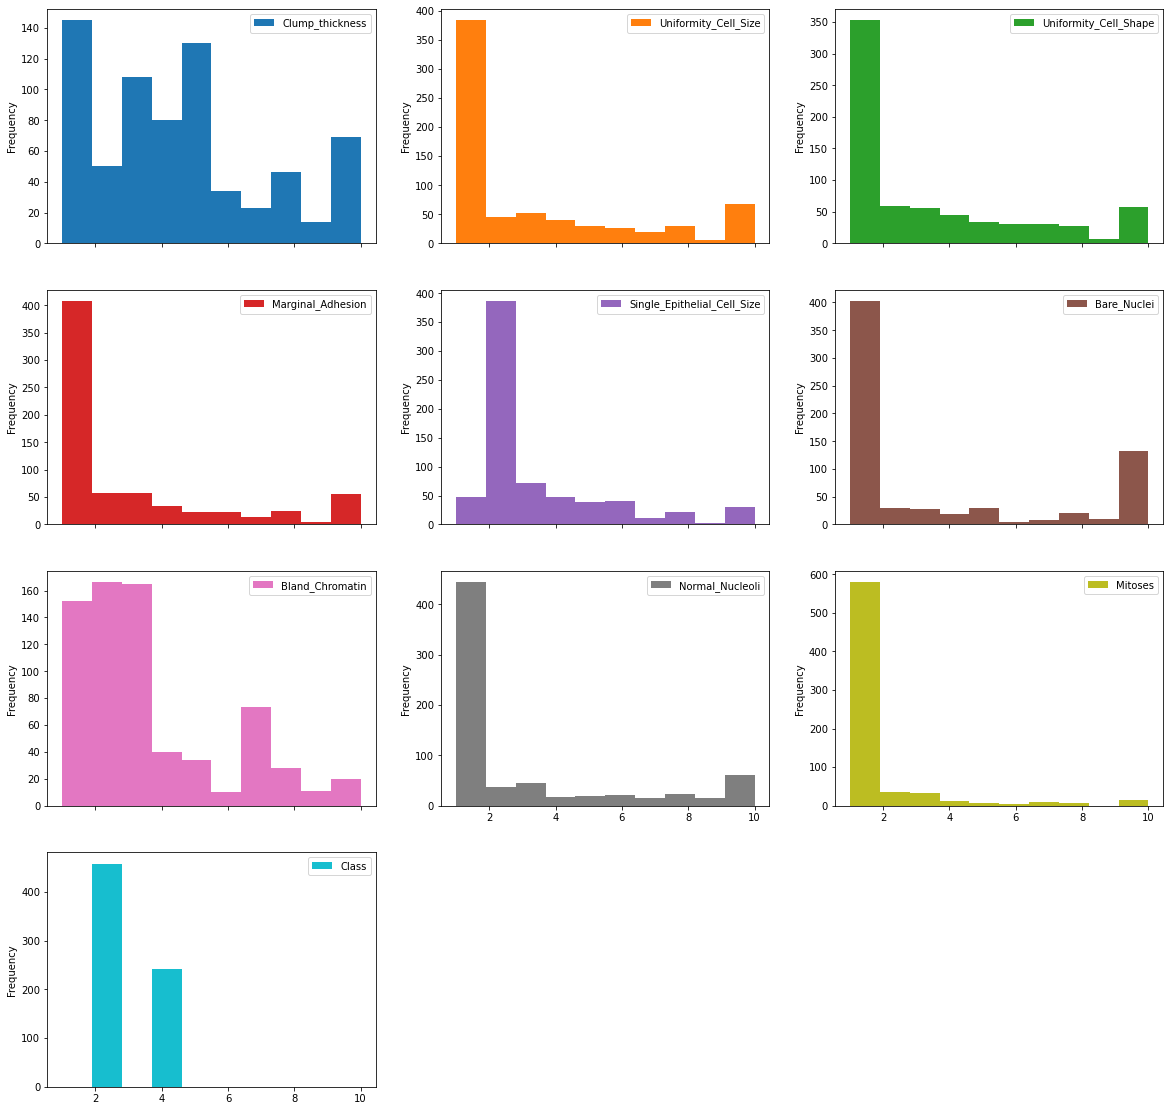

In [31]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(20,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,3))

plt.show()

***We can see that all the variables in the dataset are positively skewed***

# Multivariate plots

#***Estimating correlation coefficients***

Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr() method as follows:-

In [22]:
correlation = df.corr()

Our target variable is Class. So, we should check how each attribute correlates with the Class variable. We can do it as follows

In [23]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

#**Interpretation

The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.

We can see that all the variables are positively correlated with Class variable. Some variables are strongly positive correlated while some variables are negatively correlated.

#***Discover patterns and relationships

An important step in EDA is to discover patterns and relationships between variables in the dataset. I will use the seaborn heatmap to explore the patterns and relationships in the dataset.***

# Correlation Heat Map

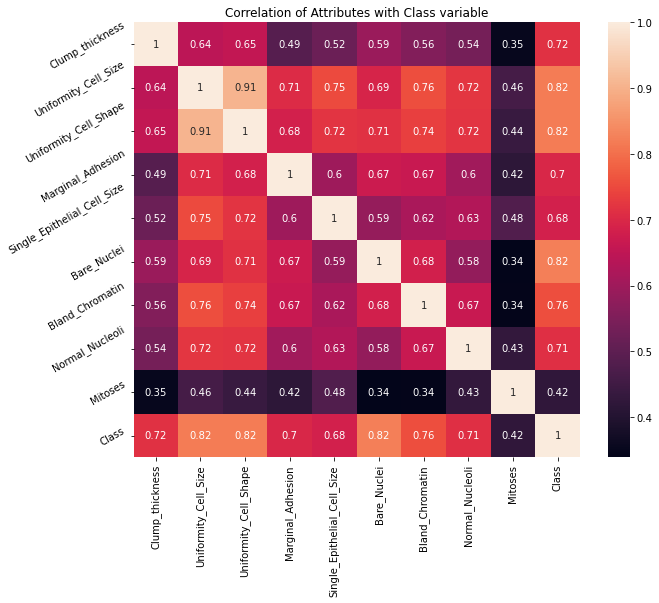

In [33]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation,  annot=True,  linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

#**Interpretation**


From the above correlation heat map, we can conclude that :-

Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).

Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50

# ***Declare feature vector and target variable***

In [34]:
X = df.drop(['Class'], axis=1)

y = df['Class']

## Split data into separate training and test set

In [37]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((559, 9), (140, 9))

##  Feature Engineering ¶


Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables

In [39]:
# check data types in X_train

X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

## missing values in variables

In [40]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    11
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [41]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    5
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

# Assumption
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting

In [43]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [45]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [46]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

We can see that there are no missing values in X_train and X_test

#**We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.**

## Feature Scaling

In [47]:
cols = X_train.columns

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [54]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [55]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.164886,-0.383175,-0.760698,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
1,0.164886,-0.054655,-0.096276,0.405629,-0.554964,0.113334,-0.183205,0.392303,-0.349724
2,-1.236959,-0.711694,-0.760698,-0.293128,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
3,0.164886,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724
4,-0.886498,-0.711694,-0.096276,-0.293128,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724


We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows

# Fit K Neighbours Classifier to the training eet

In [58]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict test-set results

In [59]:
y_pred = knn.predict(X_test)

y_pred

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

predict_proba method

predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

2 is for probability of benign cancer and 4 is for probability of malignant cancer.

In [68]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.33333333, 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.66666667,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.66666667,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.     

In [72]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.66666667, 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.33333333,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.33333333,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.     

# Check accuracy score

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

print('Model accuracy score:', accuracy_score(y_test, y_pred))

Model accuracy score: 0.9714285714285714


## Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [77]:
y_pred_train = knn.predict(X_train)

In [82]:
accuracy_score(y_train, y_pred_train)

print('Training-set accuracy score:', accuracy_score(y_train, y_pred_train))

Training-set accuracy score: 0.9803220035778175


In [83]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9803
Test set score: 0.9714


The training-set accuracy score is 0.9803 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting

## Compare model accuracy with null accuracy

So, the model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set

In [84]:
# check class distribution in test set

y_test.value_counts()

2    95
4    45
Name: Class, dtype: int64

We can see that the occurences of most frequent class is 95. So, we can calculate null accuracy by dividing 85 by total number of occurences.

In [85]:
# check null accuracy score

null_accuracy = (95/(95+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6333


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6333. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels

## Rebuild kNN Classification model using different values of k

# k=5

In [86]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


## Rebuild kNN Classification model using 
# k=6

In [87]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9571


## Rebuild kNN Classification model using 
# k=7

In [88]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9714


# Rebuild kNN Classification model using 
# k=11

In [97]:
# instantiate the model with k=11
knn_11 = KNeighborsClassifier(n_neighbors=11)


# fit the model to the training set
knn_11.fit(X_train, y_train)


# predict on the test-set
y_pred_11 = knn_11.predict(X_test)


print('Model accuracy score with k=11 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_11)))

Model accuracy score with k=11 : 0.9786


# Interpretation

Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5,7  & k=6 is again low . But, if we increase the value of k further, this would result in enhanced accuracy.

With k=11 we get accuracy score of 0.9786. So, it results in performance improvement.


***Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.***

***But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.***

***We have another tool called Confusion matrix that comes to our rescue.***

# Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [99]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[94,  1],
       [ 3, 42]], dtype=int64)

In [100]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  94

True Negatives(TN) =  42

False Positives(FP) =  1

False Negatives(FN) =  3


The confusion matrix shows 94 + 42 = 136 correct predictions and 1 + 3 = 4 incorrect predictions.



In [102]:
# Print the Confusion Matrix with k =11 and slice it into four pieces

cm_11 = confusion_matrix(y_test, y_pred_11)

print('Confusion matrix\n\n', cm_11)

print('\nTrue Positives(TP) = ', cm_11[0,0])

print('\nTrue Negatives(TN) = ', cm_11[1,1])

print('\nFalse Positives(FP) = ', cm_11[0,1])

print('\nFalse Negatives(FN) = ', cm_11[1,0])

Confusion matrix

 [[94  1]
 [ 2 43]]

True Positives(TP) =  94

True Negatives(TN) =  43

False Positives(FP) =  1

False Negatives(FN) =  2


The above confusion matrix shows 94 + 43 = 137 correct predictions and 1 + 2 = 3 incorrect predictions

# ***So, kNN Classification model with k=11 shows more accurate predictions and less number of errors than k=3,5,6,7 model. Hence, we got performance improvement with k=11***

<AxesSubplot:>

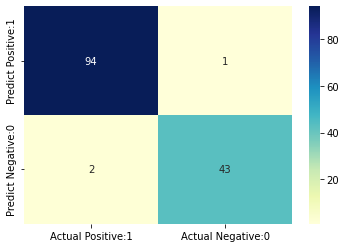

In [108]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_11, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Report

Classification report is another way to evaluate the classification model performance

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_11))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98        95
           4       0.98      0.96      0.97        45

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



## Classification accuracy

In [112]:
TP = cm_11[0,0]
TN = cm_11[1,1]
FP = cm_11[0,1]
FN = cm_11[1,0]


In [113]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9786


## Classification error

In [114]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0214


## Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP)

Mathematically, precision can be defined as the ratio of TP to (TP + FP)

In [115]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9895


## Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [116]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9792


In [118]:
# True Positive Rate
# True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9792


In [117]:
# False Positive Rate
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0227


## Specificity

In [121]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9773


## Adjusting the classification threshold level

In [123]:
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_prob = knn.predict_proba(X_test)

y_pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

Classification threshold level

There is a classification threshold level of 0.5.

Class 4 - probability of malignant cancer is predicted if probability > 0.5.

Class 2 - probability of benign cancer is predicted if probability < 0.5.

In [124]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
135,1.0,0.0
136,0.0,1.0
137,1.0,0.0
138,1.0,0.0


In [125]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(X_test)[0:10, 1]

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0.])

In [126]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

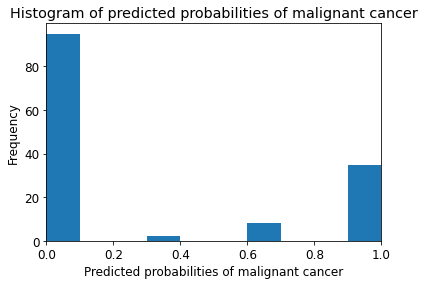

In [129]:
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

# Observations

We can see that the above histogram is positively skewed.
The first column tell us that there are approximately 80 observations with 0 probability of malignant cancer.
There are few observations with probability > 0.5.
So, these few observations predict that there will be malignant cancer.

# ROC-AUC

## ROC Curve¶

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN)

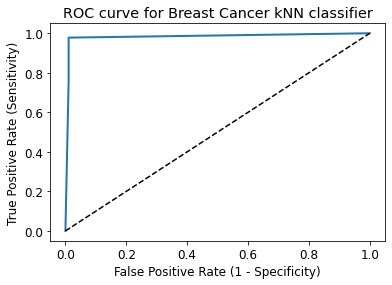

In [130]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [131]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9825


In [133]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_11, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9859


In [135]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_11, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.94642857 0.96428571 0.98214286 0.94642857 0.96428571 1.
 0.98214286 0.96428571 0.92857143 0.94545455]


In [136]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9624
